In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np

# a

In [ ]:
df1 = pd.read_csv('gdrive/My Drive/project2/M(1).csv')

df2 = pd.read_csv('gdrive/My Drive/project2/allrate.csv')[['index', 'title']].drop_duplicates()

df3 = df2.merge(df1, left_on='index', right_on='dish_index')
df3.drop(['index', 'dish_index'], axis=1, inplace=True)

df_M = df3.set_index('title').T

In [ ]:
df_M
# Mij: rating of person i to dish j
# 2597 people
# 270 dish

title,"Curried Lentil, Tomato, and Coconut Soup",Roasted Butternut Squash with Herb Oil and Goat Cheese,Pumpkin Muffins,"Chopped Salad with Shallot Vinaigrette, Feta, and Dill",Grain Salad with Olives and Whole-Lemon Vinaigrette,Chilled Coconut Corn Soup,Vietnamese-Style Spaghetti Squash “Noodle” Bowls with Skirt Steak,Roasted Squash with Mint and Toasted Pumpkin Seeds,Butternut Squash Steaks with Brown Butter–Sage Sauce,Freeform Chicken Meatballs with Carrots and Yogurt Sauce,...,Twice-Roasted Squash with Parmesan Butter and Grains,"Kale Salad with Butternut Squash, Pomegranate, and Pumpkin Seeds",Kabocha Squash Pilaf with Coconut,Chile-Marinated Pork with Vietnamese Brussels Sprouts,White Chicken Chili,One-Pot Curried Cauliflower with Couscous and Chickpeas,Acorn Squash with Kale and Sausage,Hummus Dinner Bowls with Spiced Ground Beef and Tomatoes,Autumn Kale Salad,Pumpkin Icebox Pie With Snickerdoodle Crust
rhaeredekop from Winnipeg,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lizgoldsmith1960 from Lincoln,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bmaybeegeorge from Canada,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adventurousz from Boulder,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
epaul77 from Mississippi,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kderevyanik from Southlake,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
jcp76 from Pittsburgh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
mlrn853 from Philadelphia area,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
waughbash158 from Edmond,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_member = pd.read_csv('../data/rating_with_group_member.csv')

In [ ]:
df_member = df_member.set_index('Unnamed: 0')

In [ ]:
df_new = pd.concat([df_M, df_member], axis=0)

In [ ]:
M = np.array(df_new)
from sklearn.decomposition import NMF
model = NMF(n_components=5, init='random', random_state=0)
W = model.fit_transform(M)
H = model.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
W.shape

(2601, 5)

In [ ]:
H.shape

(5, 270)

In [ ]:
np.round(np.dot(W[-4:], H))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 3.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
H

array([[0.00000000e+000, 0.00000000e+000, 1.78689392e-002, ...,
        0.00000000e+000, 0.00000000e+000, 2.15260729e-001],
       [0.00000000e+000, 7.10752150e-004, 3.12216251e-003, ...,
        8.05709583e-001, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.27895871e-003, 8.53798297e-221, 0.00000000e+000],
       [0.00000000e+000, 4.18942351e-002, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [5.18461908e-001, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]])

In [ ]:
def projection(M):
    M_predicted = np.round(M) 
    M_predicted = np.where(M < 1, 1, M_predicted)
    M_predicted = np.where(M > 5, 5, M_predicted)
    return M_predicted

In [ ]:
H_pro = projection(H)
H_pro

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

# d

In [ ]:
# i: user, N1
# j: dish, N2
# ui: index set of dish rated by user i
# vj: index set of users rated dish j
# (i, j) set of user i rated dish j

In [ ]:
M = np.array(df_new)
M.shape

(2601, 270)

In [ ]:
M

array([[5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
np.where(M != 0)

(array([   0,    1,    1, ..., 2600, 2600, 2600]),
 array([  0,   0, 113, ..., 249, 255, 256]))

In [ ]:
def initialize_v(lambd, N2, d):
    '''
    lambd: lambda from function
    N2: number of dishes
    d: shape
    '''
    # initialize v with normal distribution
    # shape v: (N2, d)
    mean = [0]*d
    std = [1/lambd]*d
    np.random.seed(1)
    v0 = np.array([np.random.normal(loc=mean, scale=std) for _ in range(N2)])
    return v0

In [ ]:
def initialize_u(N1, d):
    '''
    N1: number of user
    d: shape
    '''
    # initialize u as 0.0
    # shape u: (N1, d)
    u0 = np.array([[0.0 for _ in range(d)] for _ in range(N1)])
    return u0

In [ ]:
def coordinate_ui(i, mu, lambd, d, v, M):
    '''
    i: row index of u
    mu, lambd: from function
    d: shape
    v: the second part of low rank factorization
    M: rating matrix
    '''
    # find the idx where the rating of movie from user i is not missing
    idx = np.where(M[i] != 0)
    # select the related part from v and M
    v = v[idx].T
    M = M[i, idx].reshape(-1, 1)
    # calculate new ui based on the function
    first_item = mu/lambd * np.identity(d) + np.dot(v, v.T)
    second_item = np.dot(v, M)
    ui = np.dot(np.linalg.inv(first_item), second_item)
    return ui.T

In [ ]:
def coordinate_vj(j, mu, lambd, d, u, M):
    '''
    j: row index of v
    mu, lambd: from function
    d: shape
    u: the first part of low rank factorization
    M: rating matrix
    '''
    # find the idx where the rating of movie j is not missing
    M1 = M.T
    idx = np.where(M1[j] != 0)
    # select the related part from u and M
    u = u[idx].T
    M = M[idx][:, j].reshape(-1, 1)
    # calculate new vj based on the function
    first_item = mu/lambd * np.identity(d) + np.dot(u, u.T)
    second_item = np.dot(u, M)
    vj = np.dot(np.linalg.inv(first_item), second_item)
    return vj.T

In [ ]:
def objective(lambd, mu, M, u, v, N1, N2):
    # the function has three parts, calculate individually
    # find the index where the rating is not missing
    idx = np.where(M != 0)
    
    first_part = 0
    for k in range(len(idx[0])):
        ii = idx[0][k]
        jj = idx[1][k]
        Mij = M[ii][jj]
        ui = u[ii]
        vj = v[jj]
        first_part += np.power(Mij-np.dot(ui, vj.T), 2) * (lambd/2)
        
    second_part = 0
    for i in range(N1):
        second_part += np.power(np.linalg.norm(u[i], 2), 2) * (mu/2)
        
    third_part = 0
    for j in range(N2):
        third_part += np.power(np.linalg.norm(v[j], 2), 2) * (mu/2)
    
    obj = first_part + second_part + third_part
    return obj

In [ ]:
def coordinate_alg(lambd, mu, M, K, d):
    '''
    lambd, mu: set by us
    M: rating matrix generated based on dataset and group members' rating
    K: total number of coordinate descent iteration
    '''
    # the shape of u and v
    # u: (N1, d), v: (N2, d) -> M = u*(v.T) -> M: (N1, N2)
    N1 = M.shape[0]
    N2 = M.shape[1]
    #d = np.linalg.matrix_rank(M)
    #d = 5
    
    # initialize v and u
    v = initialize_v(lambd, N2, d)
    u = initialize_u(N1, d)

    obj_l = []
    # coordinate descent algorithm
    for k in range(K):
        # update u based on v
        for i in range(N1):
            u[i] = coordinate_ui(i, mu, lambd, d, v, M)
        # update v based on u
        for j in range(N2):
            v[j] = coordinate_vj(j, mu, lambd, d, u, M)
        # calculate new objective value
        obj = objective(lambd, mu, M, u, v, N1, N2)
        obj_l.append(obj)

        #list.append(obj)
        # log process
        if k % 10 == 0:
            print(f'Iteration:', k)
            print(obj)
            print('---------------------')
        k += 1

    print(f'Final objective value:', obj)
    return u, v, obj_l

In [ ]:
def get_rating(u, v, M):
    '''
    calculate predicted M of 4 group members = u*(v.T)
    '''
    # shape: (4, N2) 
    # rating of 4 group members of all dishes
    N1 = M.shape[0]
    # the last 4 rows are group members' rating
    M_predicted = np.dot(u[N1-4:], v.T)
    # refine the result: round to int, project the range between 1-5
    M_predicted = np.round(M_predicted)
    M_predicted = np.where(M_predicted < 1, 1, M_predicted)
    M_predicted = np.where(M_predicted > 5, 5, M_predicted)
    return M_predicted

In [ ]:
def update_rating(df_member, M_predicted):
    '''
    update the missing rating to predicted value
    '''
    df_member_new = df_member.copy()
    for i in range(df_member.shape[0]):
        for j in range(df_member.shape[1]):
            # if the dish is not rated by group member, update to predicted rating
            if df_member.iloc[i, j] == 0:
                df_member_new.iloc[i, j] = M_predicted[i][j]
    return df_member_new

The most common type of regularization is L2, also called simply “weight decay,” with values often on a logarithmic scale between 0 and 0.1, such as 0.1, 0.001, 0.0001, etc.

In [ ]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
import matplotlib.pyplot as plt

def plot_cost(y_value):
    plt.rcParams["figure.figsize"] = (16, 5)
    plt.plot([i for i in range(len(y_value))], y_value)
    plt.xlabel('Iteration', size=20)
    plt.ylabel('Objective Value', size=20)

In [ ]:
def run(d):
    #u, v, obj = coordinate_alg(1, 1, M, 20)
    u, v, obj_l = coordinate_alg(lambd=0.999, mu=0.001, M=M, K=200, d=d)
    M_predicted = get_rating(u, v, M)
    df_member_new = update_rating(df_member, M_predicted)
    # cache = (u, v, obj, M_predicted)
    return df_member_new, obj_l, M_predicted

# result

In [ ]:
start_time = timer(None)
df_member_new1, obj_l1 = run(1)
timer(start_time)

Iteration: 0
3799.3517346095978
---------------------
Iteration: 10
3161.9540846268987
---------------------
Iteration: 20
2906.83256827464
---------------------
Iteration: 30
2761.4737548689386
---------------------
Iteration: 40
2669.5474012368823
---------------------
Iteration: 50
2602.0351093782797
---------------------
Iteration: 60
2551.713666838014
---------------------
Iteration: 70
2510.2079234474672
---------------------
Iteration: 80
2468.6195101652906
---------------------
Iteration: 90
2424.3673732812786
---------------------
Iteration: 100
2386.3994870120036
---------------------
Iteration: 110
2361.3657191001325
---------------------
Iteration: 120
2341.6452287609395
---------------------
Iteration: 130
2325.155869732255
---------------------
Iteration: 140
2310.7231973453418
---------------------
Iteration: 150
2297.457721221199
---------------------
Iteration: 160
2284.2588603430154
---------------------
Iteration: 170
2271.00282637835
---------------------
Iteration:

In [ ]:
start_time = timer(None)
df_member_new2, obj_l2 = run(2)
timer(start_time)

Iteration: 0
1189.6675300674322
---------------------
Iteration: 10
579.2359378669319
---------------------
Iteration: 20
445.461446253845
---------------------
Iteration: 30
380.80301542950735
---------------------
Iteration: 40
327.95130505442296
---------------------
Iteration: 50
295.2061307310897
---------------------
Iteration: 60
270.29568872629335
---------------------
Iteration: 70
245.7637123695369
---------------------
Iteration: 80
228.84942794465417
---------------------
Iteration: 90
215.41183502066028
---------------------
Iteration: 100
203.67938624974377
---------------------
Iteration: 110
193.45726444092546
---------------------
Iteration: 120
184.7379512165172
---------------------
Iteration: 130
176.88991538733816
---------------------
Iteration: 140
169.3092705130262
---------------------
Iteration: 150
161.5358421466987
---------------------
Iteration: 160
153.02672560645607
---------------------
Iteration: 170
145.66744914889992
---------------------
Iteration: 

In [ ]:
start_time = timer(None)
df_member_new3, obj_l3 = run(3)
timer(start_time)

Iteration: 0
444.9777472405694
---------------------
Iteration: 10
99.41186390344335
---------------------
Iteration: 20
51.5549452728469
---------------------
Iteration: 30
42.54052757405111
---------------------
Iteration: 40
37.217002715596145
---------------------
Iteration: 50
32.82546011433468
---------------------
Iteration: 60
28.68471639398322
---------------------
Iteration: 70
24.546866861012678
---------------------
Iteration: 80
20.53805463570061
---------------------
Iteration: 90
17.388648594997566
---------------------
Iteration: 100
15.61895255441604
---------------------
Iteration: 110
14.735113039084961
---------------------
Iteration: 120
14.20307042044178
---------------------
Iteration: 130
13.809869459988525
---------------------
Iteration: 140
13.485888851991593
---------------------
Iteration: 150
13.204087650953486
---------------------
Iteration: 160
12.951469655969591
---------------------
Iteration: 170
12.720754505872387
---------------------
Iteration: 18

In [ ]:
start_time = timer(None)
df_member_new4, obj_l4 = run(4)
timer(start_time)

Iteration: 0
198.86644347758315
---------------------
Iteration: 10
35.871777504270995
---------------------
Iteration: 20
22.4339826694606
---------------------
Iteration: 30
17.406389085619185
---------------------
Iteration: 40
14.925501081645404
---------------------
Iteration: 50
13.697714352875789
---------------------
Iteration: 60
12.992951396809621
---------------------
Iteration: 70
12.502310705547487
---------------------
Iteration: 80
12.13998472538576
---------------------
Iteration: 90
11.83489675853338
---------------------
Iteration: 100
11.56561338390542
---------------------
Iteration: 110
11.32340541777718
---------------------
Iteration: 120
11.103280860052783
---------------------
Iteration: 130
10.901495007613041
---------------------
Iteration: 140
10.715245692137671
---------------------
Iteration: 150
10.542335002402503
---------------------
Iteration: 160
10.38100427049713
---------------------
Iteration: 170
10.22982365606128
---------------------
Iteration: 

In [ ]:
start_time = timer(None)
df_member_new5, obj_l5, M_predicted = run(5)
timer(start_time)

Iteration: 0
51.29859970408493
---------------------
Iteration: 10
13.63780474541028
---------------------
Iteration: 20
12.833581683278478
---------------------
Iteration: 30
12.319326219148502
---------------------
Iteration: 40
11.914610290384257
---------------------
Iteration: 50
11.575993194767287
---------------------
Iteration: 60
11.283956820467253
---------------------
Iteration: 70
11.027122466644698
---------------------
Iteration: 80
10.797939117044512
---------------------
Iteration: 90
10.591027017476106
---------------------
Iteration: 100
10.402468442123212
---------------------
Iteration: 110
10.229244256366565
---------------------
Iteration: 120
10.069017312246004
---------------------
Iteration: 130
9.920402577273638
---------------------
Iteration: 140
9.781459230570732
---------------------
Iteration: 150
9.651114352412682
---------------------
Iteration: 160
9.528633684956123
---------------------
Iteration: 170
9.412899248109191
---------------------
Iteration:

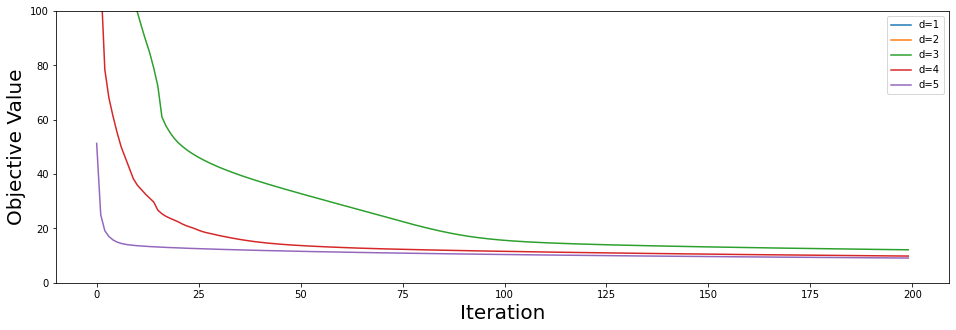

In [ ]:
plt.rcParams["figure.figsize"] = (16, 5)
plt.plot([i for i in range(len(obj_l1))], obj_l1, label='d=1')
plt.plot([i for i in range(len(obj_l2))], obj_l2, label='d=2')
plt.plot([i for i in range(len(obj_l3))], obj_l3, label='d=3')
plt.plot([i for i in range(len(obj_l4))], obj_l4, label='d=4')
plt.plot([i for i in range(len(obj_l5))], obj_l5, label='d=5')
plt.xlabel('Iteration', size=20)
plt.ylabel('Objective Value', size=20)
plt.ylim([0, 100])
plt.legend()
plt.show()

In [ ]:
df_member

title,"Curried Lentil, Tomato, and Coconut Soup",Roasted Butternut Squash with Herb Oil and Goat Cheese,Pumpkin Muffins,"Chopped Salad with Shallot Vinaigrette, Feta, and Dill",Grain Salad with Olives and Whole-Lemon Vinaigrette,Chilled Coconut Corn Soup,Vietnamese-Style Spaghetti Squash “Noodle” Bowls with Skirt Steak,Roasted Squash with Mint and Toasted Pumpkin Seeds,Butternut Squash Steaks with Brown Butter–Sage Sauce,Freeform Chicken Meatballs with Carrots and Yogurt Sauce,...,Twice-Roasted Squash with Parmesan Butter and Grains,"Kale Salad with Butternut Squash, Pomegranate, and Pumpkin Seeds",Kabocha Squash Pilaf with Coconut,Chile-Marinated Pork with Vietnamese Brussels Sprouts,White Chicken Chili,One-Pot Curried Cauliflower with Couscous and Chickpeas,Acorn Squash with Kale and Sausage,Hummus Dinner Bowls with Spiced Ground Beef and Tomatoes,Autumn Kale Salad,Pumpkin Icebox Pie With Snickerdoodle Crust
Wanning,0,0,0,0,0,0,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
Yuxuan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Qianran,0,0,0,2,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,4
Yanan,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_member_new5

title,"Curried Lentil, Tomato, and Coconut Soup",Roasted Butternut Squash with Herb Oil and Goat Cheese,Pumpkin Muffins,"Chopped Salad with Shallot Vinaigrette, Feta, and Dill",Grain Salad with Olives and Whole-Lemon Vinaigrette,Chilled Coconut Corn Soup,Vietnamese-Style Spaghetti Squash “Noodle” Bowls with Skirt Steak,Roasted Squash with Mint and Toasted Pumpkin Seeds,Butternut Squash Steaks with Brown Butter–Sage Sauce,Freeform Chicken Meatballs with Carrots and Yogurt Sauce,...,Twice-Roasted Squash with Parmesan Butter and Grains,"Kale Salad with Butternut Squash, Pomegranate, and Pumpkin Seeds",Kabocha Squash Pilaf with Coconut,Chile-Marinated Pork with Vietnamese Brussels Sprouts,White Chicken Chili,One-Pot Curried Cauliflower with Couscous and Chickpeas,Acorn Squash with Kale and Sausage,Hummus Dinner Bowls with Spiced Ground Beef and Tomatoes,Autumn Kale Salad,Pumpkin Icebox Pie With Snickerdoodle Crust
Wanning,1,5,1,2,3,1,1,4,4,2,...,1,1,3,1,1,1,1,1,4,3
Yuxuan,1,4,1,4,2,2,1,4,2,1,...,1,3,2,1,1,1,1,1,1,5
Qianran,1,2,1,2,3,1,1,4,3,1,...,1,1,2,1,2,1,1,2,1,4
Yanan,1,1,1,1,1,1,1,3,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
count=[0]*5
for i in range(len(M_predicted)):
  for j in range(len(M_predicted[0])):
    if M_predicted[i][j] == 1:
      count[0]+=1
    if M_predicted[i][j] == 2:
      count[1]+=1
    if M_predicted[i][j] == 3:
      count[2]+=1
    if M_predicted[i][j] == 4:
      count[3]+=1
    if M_predicted[i][j] == 5:
      count[4]+=1
count

[751, 113, 84, 68, 64]

In [ ]:
dff = pd.read_csv('gdrive/My Drive/project2/ind_name_rate.csv')
dff['rate'].value_counts()

5.0    1902
4.0     508
3.0     216
2.0     174
1.0     124
Name: rate, dtype: int64

In [ ]:
df_member_new5.to_csv('gdrive/My Drive/project2/rating_with_group_member_predicted.csv')

# **stopping until converge**

In [ ]:
def coordinate_alg_earlystopping(lambd, mu, M, K):
    '''
    lambd, mu: set by us
    M: rating matrix generated based on dataset and group members' rating
    K: total number of coordinate descent iteration
    '''
    # the shape of u and v
    # u: (N1, d), v: (N2, d) -> M = u*(v.T) -> M: (N1, N2)
    N1 = M.shape[0]
    N2 = M.shape[1]
    #d = np.linalg.matrix_rank(M)
    d = 5
    
    # initialize v and u
    v = initialize_v(lambd, N2, d)
    u = initialize_u(N1, d)
    
    # initialize list
    list = []
    list.append(20000000)
    difference=20000000
    k=1
    # coordinate descent algorithm
    while (difference>=10):
        # update u based on v
        for i in range(N1):
            u[i] = coordinate_ui(i, mu, lambd, d, v, M)
        # update v based on u
        for j in range(N2):
            v[j] = coordinate_vj(j, mu, lambd, d, u, M)
        # calculate new objective value
        obj = objective(lambd, mu, M, u, v, N1, N2)
        list.append(obj)
        difference=list[k-1]-obj
        # log process
        if k % 2 == 0:
            print(f'Iteration:', k)
            print(obj)
            print(f'difference:')
            print(difference)
            print('---------------------')
        k += 1
    
    print(f'Final objective value:',obj)
    return u, v, obj

In [ ]:
def run():
    #u, v, obj = coordinate_alg(1, 1, M, 20)
    u, v, obj = coordinate_alg_earlystopping(5, 1, M, 50)
    M_predicted = get_rating(u, v, M)
    df_member_new = update_rating(df_member, M_predicted)
    cache = (u, v, obj, M_predicted)
    return df_member_new, cache

In [ ]:
df_member_new, cache = run()

Iteration: 2
16169.21444888489
difference:
15848.09054435683
---------------------
Iteration: 4
10745.032660596295
difference:
1976.023851822636
---------------------
Iteration: 6
8398.840450671989
difference:
991.182898118992
---------------------
Iteration: 8
7049.201502522446
difference:
593.8886264202256
---------------------
Iteration: 10
6180.427568969584
difference:
391.1660337430558
---------------------
Iteration: 12
5581.750009062644
difference:
273.54953049909545
---------------------
Iteration: 14
5149.859252829727
difference:
199.37077078289803
---------------------
Iteration: 16
4827.880558173878
difference:
149.7496085625662
---------------------
Iteration: 18
4581.853492043658
difference:
115.08114580647907
---------------------
Iteration: 20
4390.206530043375
difference:
90.05241111452415
---------------------
Iteration: 22
4238.577945239824
difference:
71.51345383494117
---------------------
Iteration: 24
4117.05509731167
difference:
57.491950919754345
---------------

In [ ]:
df_member_new

,"Curried Lentil, Tomato, and Coconut Soup",Roasted Butternut Squash with Herb Oil and Goat Cheese,Pumpkin Muffins,"Chopped Salad with Shallot Vinaigrette, Feta, and Dill",Grain Salad with Olives and Whole-Lemon Vinaigrette,Chilled Coconut Corn Soup,Vietnamese-Style Spaghetti Squash “Noodle” Bowls with Skirt Steak,Roasted Squash with Mint and Toasted Pumpkin Seeds,Butternut Squash Steaks with Brown Butter–Sage Sauce,Freeform Chicken Meatballs with Carrots and Yogurt Sauce,...,Twice-Roasted Squash with Parmesan Butter and Grains,"Kale Salad with Butternut Squash, Pomegranate, and Pumpkin Seeds",Kabocha Squash Pilaf with Coconut,Chile-Marinated Pork with Vietnamese Brussels Sprouts,White Chicken Chili,One-Pot Curried Cauliflower with Couscous and Chickpeas,Acorn Squash with Kale and Sausage,Hummus Dinner Bowls with Spiced Ground Beef and Tomatoes,Autumn Kale Salad,Pumpkin Icebox Pie With Snickerdoodle Crust
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Wanning,1,5,5,5,4,5,1,4,4,5,...,1,1,2,1,5,4,1,4,5,2
Yuxuan,3,5,5,1,1,1,1,1,2,1,...,1,1,2,1,3,1,1,1,1,5
Qianran,5,5,5,2,1,1,1,3,3,4,...,1,5,2,1,5,2,3,4,2,4
Yanan,1,1,3,1,1,1,1,3,4,1,...,2,1,1,5,1,1,1,1,1,1


# b, c

In [ ]:
# random for four group members
# percent of 270
# pretend to be the rating
Wanning = [np.random.choice(np.arange(0, 6), p=[0.9, 0.02, 0.02, 0.02, 0.02, 0.02]) for _ in range(270)]
Yuxuan = [np.random.choice(np.arange(0, 6), p=[0.9, 0.01, 0.03, 0.02, 0.02, 0.02]) for _ in range(270)]
Qianran = [np.random.choice(np.arange(0, 6), p=[0.9, 0.01, 0.02, 0.03, 0.03, 0.01]) for _ in range(270)]
Yanan = [np.random.choice(np.arange(0, 6), p=[0.9, 0.01, 0.01, 0.02, 0.04, 0.02]) for _ in range(270)]

df_member = pd.DataFrame([Wanning, Yuxuan, Qianran, Yanan], 
                         index=['Wanning', 'Yuxuan', 'Qianran', 'Yanan'])
df_member.columns = df_M.columns

df_new = df_M.append(df_member)

In [ ]:
df_new.tail(4)

title,"Curried Lentil, Tomato, and Coconut Soup",Roasted Butternut Squash with Herb Oil and Goat Cheese,Pumpkin Muffins,"Chopped Salad with Shallot Vinaigrette, Feta, and Dill",Grain Salad with Olives and Whole-Lemon Vinaigrette,Chilled Coconut Corn Soup,Vietnamese-Style Spaghetti Squash “Noodle” Bowls with Skirt Steak,Roasted Squash with Mint and Toasted Pumpkin Seeds,Butternut Squash Steaks with Brown Butter–Sage Sauce,Freeform Chicken Meatballs with Carrots and Yogurt Sauce,...,Twice-Roasted Squash with Parmesan Butter and Grains,"Kale Salad with Butternut Squash, Pomegranate, and Pumpkin Seeds",Kabocha Squash Pilaf with Coconut,Chile-Marinated Pork with Vietnamese Brussels Sprouts,White Chicken Chili,One-Pot Curried Cauliflower with Couscous and Chickpeas,Acorn Squash with Kale and Sausage,Hummus Dinner Bowls with Spiced Ground Beef and Tomatoes,Autumn Kale Salad,Pumpkin Icebox Pie With Snickerdoodle Crust
Wanning,0,0,0,0,0,0,0,4,0,0,...,0,1,0,0,0,0,0,0,0,0
Yuxuan,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
Qianran,0,0,0,2,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,4
Yanan,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_member.to_csv('gdrive/My Drive/project2/rating_with_group_member.csv')